<a href="https://colab.research.google.com/github/lphuong304/CS116.M11/blob/main/Practice%20In%20Class/19520227/BaiTap8/19520227_BT8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><strong>BÀI TẬP 8 - 26/10/2021</strong></h1>
<h1 align="center"><strong>LẬP TRÌNH PYTHON CHO MÁY HỌC CS116.M11 - BÀI TOÁN LINEAR REGRESSION </strong></h1>

# GIỚI THIỆU:

1. Họ và tên: Nguyễn Ngọc Lan Phương
2. MSSV: 19520227 - KHMT2019
3. Lớp: CS116.M11
4. Bài tập: Bài toán Linear Regression.
5. Ngày thực hiện: 26/10/2021

# MỤC LỤC
1. [get data](#1)
2. [import packages](#2)
3. [bài tập 1: linear regression đơn biến](#3)
4. [bài tập 2: linear regression đa biến](#4)

<a name = "1"></a>
#1. import packages

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

<a name = "2"></a>
#2. get data

In [ ]:
!gdown --id 1TskjrzWz6NN0HUGlXNGZ89GXANeta9Rr
!gdown --id 1Io9T7pIjRUck79cPMuowq--tleM868fQ

Downloading...
From: https://drive.google.com/uc?id=1TskjrzWz6NN0HUGlXNGZ89GXANeta9Rr
To: /content/Salary_Data.csv
100% 454/454 [00:00<00:00, 759kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Io9T7pIjRUck79cPMuowq--tleM868fQ
To: /content/50_Startups.csv
100% 2.44k/2.44k [00:00<00:00, 3.56MB/s]


In [ ]:
dataSalary = pd.read_csv('/content/Salary_Data.csv')
dataSalary.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
dataStartup = pd.read_csv('/content/50_Startups.csv')
dataStartup.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<a name = "3"></a>
#3. Bài tập 1: Bài tập Linear Regression đơn biến

In [ ]:
X1 = dataSalary.iloc[:,:-1]
y1 = dataSalary.iloc[:,-1:]

###3.1 Phân chia tập train:test (8:2)

In [ ]:
X_trainSal, X_testSal, y_trainSal, y_testSal = train_test_split(X1,y1,test_size = 0.2, random_state = 42)
print('Số mẫu dữ liệu trong tập train:{}'.format(X_trainSal.shape))
print('Số mẫu dữ liệu trong tập test:{}'.format(X_testSal.shape))

Số mẫu dữ liệu trong tập train:(24, 1)
Số mẫu dữ liệu trong tập test:(6, 1)


###3.2 Dùng Linear Regression để dự đoán

In [ ]:
lr1 = LinearRegression()
lr1.fit(X_trainSal, y_trainSal)

predictSal = lr1.predict(X_testSal)

loss = lr1.score( X_testSal,y_testSal)
print('Score: {}'.format(round(loss,3)))

Score: 0.902


###3.3 Visualize

<function matplotlib.pyplot.show>

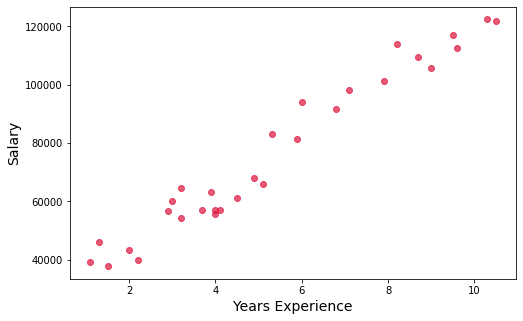

In [ ]:
#visulize datasets
_,ax = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
ax.scatter(X1, y1, facecolor='crimson', alpha=0.7, label='y_test')
ax.set_xlabel('Years Experience', fontsize = 14)
ax.set_ylabel('Salary', fontsize = 14)
plt.show

<function matplotlib.pyplot.show>

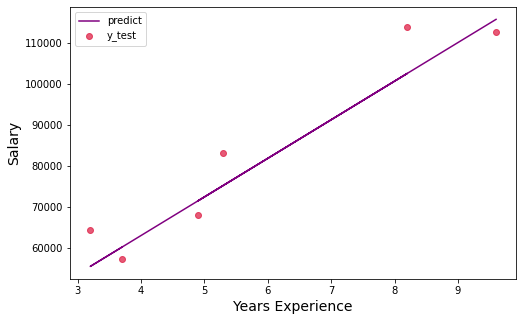

In [ ]:
#visulize model
_,ax = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
ax.scatter(X_testSal, y_testSal, facecolor='crimson', alpha=0.7, label='y_test')
ax.set_xlabel('Years Experience', fontsize = 14)
ax.set_ylabel('Salary', fontsize = 14)
ax.plot(X_testSal,predictSal, color = 'purple', label = 'predict')
ax.legend(['predict','y_test'])
plt.show

###3.4 Sử dụng các mô hình Classifier và KFold

In [ ]:
#convert continuous data to catergorical
catergory = pd.cut(dataSalary.Salary,bins=[0,20000,40000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,180000,200000],labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
dataSalary.insert(1,'Salary_Catergorical', catergory)
dataSalCater = dataSalary[['YearsExperience','Salary_Catergorical']]
dataSalCater

,YearsExperience,Salary_Catergorical
0,1.1,1
1,1.3,2
2,1.5,1
3,2.0,2
4,2.2,1
5,2.9,2
6,3.0,3
7,3.2,2
8,3.2,3
9,3.7,2


In [ ]:
X3 = dataSalCater.iloc[:,:-1]
y3 = dataSalCater.iloc[:,-1:]

In [ ]:
#hàm chia data theo Kfold, predict và evaluate
def kFold_each_model(X, y, model, n_splits):
  evaluate = KFold(n_splits=n_splits, random_state=None)
  model = model
  
  acc_score = []
  
  for train_index , test_index in evaluate.split(X):
      X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train, y_test = y.iloc[train_index] , y.iloc[test_index]
      
      model.fit(X_train,y_train)
      predictY = model.predict(X_test)
      
      acc = model.score(X_test,y_test)
      acc_score.append(round(acc,3))
      
  avg_acc_score = round(sum(acc_score)/n_splits,3)
  acc_score.append(avg_acc_score)
  return acc_score

####3.4.1 KNN

In [ ]:
knn = KNeighborsClassifier( n_neighbors=5)
acc_score_knn = kFold_each_model(X3, y3,knn, 5)
acc_score_knn

[0.0, 0.333, 0.333, 0.167, 0.0, 0.167]

####3.4.2 SVM BRF

In [ ]:
svc = SVC()
acc_score_svm= kFold_each_model(X3, y3,svc, 5)
acc_score_svm

[0.0, 0.5, 0.333, 0.167, 0.333, 0.267]

####3.4.3 Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
acc_score_dtree = kFold_each_model(X3, y3,dtree, 5)
acc_score_dtree

[0.0, 0.5, 0.5, 0.333, 0.333, 0.333]

####3.4.4 Naive Bayes

In [ ]:
NB = GaussianNB()
acc_score_nb = kFold_each_model(X3, y3,NB, 5)
acc_score_nb

[0.0, 0.5, 0.333, 0.0, 0.0, 0.167]

####3.4.5 Random Forest

In [ ]:
RF = RandomForestClassifier()
acc_score_rf= kFold_each_model(X3, y3,RF, 5)
acc_score_rf

[0.0, 0.5, 0.5, 0.333, 0.333, 0.333]

####3.4.6 Logistic Regression

In [ ]:
lr = LogisticRegression()
acc_score_lr = kFold_each_model(X3, y3,lr, 5)
acc_score_lr

[0.5, 0.5, 0.333, 0.167, 0.333, 0.367]

####3.4.7 SVM Kernel polynomial

In [ ]:
svcpoly = SVC(kernel='poly')
acc_score_svmpoly= kFold_each_model(X3, y3,svcpoly, 5)
acc_score_svmpoly

[0.5, 0.5, 0.5, 0.333, 0.333, 0.433]

In [ ]:
listofKeys = ['KNN', 'SVM', 'SVM Polyminal', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'Average']
listofAcc = [acc_score_knn, acc_score_svm,acc_score_svmpoly, acc_score_dtree,acc_score_nb,acc_score_rf,acc_score_lr ]

In [ ]:
zipResut = zip(listofKeys, listofAcc)
dictofData = dict(zipResut)
_result = pd.DataFrame(dictofData)
index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Average']
_result.index = index
_result

,KNN,SVM,SVM Polyminal,Decision Tree,Naive Bayes,Random Forest,Logistic Regression
Fold 1,0.000,0.000,0.500,0.000,0.000,0.000,0.500
Fold 2,0.333,0.500,0.500,0.500,0.500,0.500,0.500
Fold 3,0.333,0.333,0.500,0.500,0.333,0.500,0.333
Fold 4,0.167,0.167,0.333,0.333,0.000,0.333,0.167
Fold 5,0.000,0.333,0.333,0.333,0.000,0.333,0.333
Average,0.167,0.267,0.433,0.333,0.167,0.333,0.367


<a name = "4"></a>
#4. Bài tập 2: Bài tập Linear Regression đa biến

###4.1 Tiền xử lý dữ liệu

In [ ]:
print('Unique State in Datasets:{}'.format(dataStartup['State'].unique()))

Unique State in Datasets:['New York' 'California' 'Florida']


In [ ]:
#one hot encoding categorical data
dataStartup = pd.get_dummies(dataStartup)
dataStartup = dataStartup[['R&D Spend','Administration','Marketing Spend','State_California',	'State_Florida',	'State_New York','Profit']]

In [ ]:
#convert continuous data to catergorical
catergory2 = pd.cut(dataStartup.Profit,bins=[0,20000,40000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,180000,200000],labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
dataStartup.insert(6,'Profit_Catergorical', catergory2)
# dataStartupCater = dataStartup[['R&D Spend',	'Administration',	'Marketing Spend',	'State_California',	'State_Florida', 'State_Florida'	,'Profit_Catergorical']]
dataStartup

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit_Catergorical,Profit
0,165349.20,136897.80,471784.10,0,0,1,14,192261.83
1,162597.70,151377.59,443898.53,1,0,0,14,191792.06
2,153441.51,101145.55,407934.54,0,1,0,14,191050.39
3,144372.41,118671.85,383199.62,0,0,1,14,182901.99
4,142107.34,91391.77,366168.42,0,1,0,13,166187.94
5,131876.90,99814.71,362861.36,0,0,1,12,156991.12
6,134615.46,147198.87,127716.82,1,0,0,12,156122.51
7,130298.13,145530.06,323876.68,0,1,0,12,155752.60
8,120542.52,148718.95,311613.29,0,0,1,12,152211.77
9,123334.88,108679.17,304981.62,1,0,0,11,149759.96


In [ ]:
X2 = dataStartup.iloc[:,:-2]
y2 = dataStartup[['Profit']] #use for linear regression
y4 = dataStartup[['Profit_Catergorical']] #use for classification

In [ ]:
#standard data
scaler = StandardScaler()
scaledX = scaler.fit_transform(X2)

###4.2 Phân chia tập train:test (8:2) để dùng cho model Linear Regression

In [ ]:
X_trainStu, X_testStu, y_trainStu, y_testStu = train_test_split(scaledX,y2,test_size = 0.2)
print('Số mẫu dữ liệu trong tập train:{}'.format(X_trainStu.shape))
print('Số mẫu dữ liệu trong tập test:{}'.format(X_testStu.shape))

Số mẫu dữ liệu trong tập train:(40, 6)
Số mẫu dữ liệu trong tập test:(10, 6)


###4.3 Dùng Linear Regression để dự đoán

In [ ]:
lr2 = LinearRegression()

lr2.fit(X_trainStu, y_trainStu)

predictStu = lr2.predict(X_testStu)

score2 = lr2.score(X_testStu, predictStu)
print('Score: {}'.format(round(loss,3)))

Score: 0.902


###4.4 Sử dụng các mô hình Classifier và KFold

####4.4.1 KNN

In [ ]:
acc_score_knn2 = kFold_each_model(X3, y4,knn, 5)
acc_score_knn2

[0.167, 0.0, 0.167, 0.5, 0.0, 0.167]

#### 4.4.2 SVM BRF

In [ ]:
acc_score_svm2= kFold_each_model(X3, y4,svc, 5)
acc_score_svm2

[0.0, 0.0, 0.0, 0.5, 0.0, 0.1]

#### 4.4.3 Decision Tree

In [ ]:
acc_score_dtree2 = kFold_each_model(X3, y4,dtree, 5)
acc_score_dtree2

[0.167, 1.0, 0.5, 0.5, 1.0, 0.633]

#### 4.4.4 Naive Bayes

In [ ]:
acc_score_nb2 = kFold_each_model(X3, y4,NB, 5)
acc_score_nb2

[0.167, 0.167, 0.167, 0.5, 0.0, 0.2]

###4.4.5 Random Forest

In [ ]:
acc_score_rf2= kFold_each_model(X3, y4,RF, 5)
acc_score_rf2

[0.167, 1.0, 0.5, 0.5, 1.0, 0.633]

####4.4.6 Logistic Regression

In [ ]:
acc_score_lr2 = kFold_each_model(X3, y4,lr, 5)
acc_score_lr2

[0.167, 0.0, 0.0, 0.5, 0.0, 0.133]

####4.4.7 SVM Kernel polynomial

In [ ]:
acc_score_svmpoly2= kFold_each_model(X3, y4,svcpoly, 5)
acc_score_svmpoly2

[0.167, 0.0, 0.333, 0.5, 1.0, 0.4]

####4.4.8 Comparision Table

In [ ]:
listofKeys = ['KNN', 'SVM', 'SVM Polyminal', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'Average']
listofAcc2 = [acc_score_knn2, acc_score_svm2,acc_score_svmpoly2, acc_score_dtree2,acc_score_nb2,acc_score_rf2,acc_score_lr2 ]

In [ ]:
zipResut = zip(listofKeys, listofAcc)
dictofData = dict(zipResut)
_result = pd.DataFrame(dictofData)
index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Average']
_result.index = index
_result

,KNN,SVM,SVM Polyminal,Decision Tree,Naive Bayes,Random Forest,Logistic Regression
Fold 1,0.000,0.000,0.500,0.000,0.000,0.000,0.500
Fold 2,0.333,0.500,0.500,0.500,0.500,0.500,0.500
Fold 3,0.333,0.333,0.500,0.500,0.333,0.500,0.333
Fold 4,0.167,0.167,0.333,0.333,0.000,0.333,0.167
Fold 5,0.000,0.333,0.333,0.333,0.000,0.333,0.333
Average,0.167,0.267,0.433,0.333,0.167,0.333,0.367
